# **LINEAR REGRESSION BLOCK START**

In [ ]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
def load_dataset():
    """ Reads dataset csv and returns pandas dataframe """
    
    filepath = "/content/Hitters_Adjusted_Salary.csv"

    df = pd.read_csv(filepath, encoding="utf-8", low_memory=False)
    
    return df

In [ ]:
def clean_dataset(a_df):
    """ Returns deduped, na-dropped, index-reset dataframe """    
    
    a_df = a_df.drop_duplicates()   
        
    a_df = a_df.dropna()
    
    a_df = a_df.drop(["Unnamed: 0", "yearID", "playerID", "teamID", "lgID", "salary", "PO", "A", "E", "DP"], axis=1)
        
    a_df = a_df.reset_index(drop=True)
    
    return a_df  

In [ ]:
def rename_columns(a_df):
    """ Returns dataframe with meaningful column names """    
    
    abbr_dict = {"GS": "games_started", "InnOuts": "inning_outs", "G": "games_played", "AB": "at_bats",\
                "R": "runs", "H": "hits", "2B": "doubles", "3B": "triples", "HR": "home_runs",\
                "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "base_on_balls",\
                "SO": "strike_outs", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits",\
                "SF": "sacrifice_flies", "GIDP": "ground_into_double_play"}
    
    a_df = a_df.rename(columns=abbr_dict)
    
    return a_df   

In [ ]:
def examine_dataset(a_df):
    """ Provides summary info and visualizations of dataset """
    
    print(a_df.info())
           
    print(f'\n\nADJ SALARY VALUE COUNTS: \n {a_df["ADJ Salary"].value_counts()}\n\n')
    
    a_df.hist(figsize = (15, 15))  
    
    # sns.PairGrid(a_df[["games_started", "inning_outs", "games_played", "at_bats", "runs", "hits", "doubles", "triples", "home_runs",\
    #                    "runs_batted_in", "stolen_bases", "caught_stealing", "base_on_balls", "strike_outs", "intentional_walks", "hit_by_pitch",\
    #                    "sacrifice_hits", "sacrifice_flies", "ground_into_double_play"]]).map_upper(plt.scatter) 

In [ ]:
def scale_dataset(a_df):
    """ Returns dataframe with target column removed, data scaled with standard scaler, data normalized, and labels """
    
    salary_labels = a_df["ADJ Salary"]    
    no_target_df = a_df.drop(columns=["ADJ Salary"])
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(no_target_df)    
    print(f"SHAPE AFTER SCALING: {scaled_data.shape}")

    return no_target_df, scaled_data, salary_labels

In [ ]:
loaded_df = load_dataset()

In [ ]:
clean_df = clean_dataset(loaded_df)

In [ ]:
clean_df = rename_columns(clean_df)

In [ ]:
clean_df.head(10)

,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,1.310892e+06,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1.503317e+06,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1.924245e+06,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,6.013267e+05,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,3.607960e+06,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
5,1.094415e+06,130.0,3425.0,142,439,51,102,21,0,5,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
6,1.864113e+06,113.0,3009.0,130,444,52,123,25,2,8,61.0,6.0,7.0,37,57.0,8.0,0.0,1.0,6.0,9.0
7,3.908623e+06,161.0,4264.0,162,616,118,185,32,2,37,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0
8,1.483273e+06,113.0,3041.0,134,412,30,112,19,4,3,35.0,1.0,2.0,51,38.0,6.0,6.0,1.0,2.0,10.0
9,2.886368e+05,50.0,1325.0,110,238,22,51,5,0,3,13.0,9.0,5.0,23,28.0,1.0,0.0,0.0,1.0,7.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15023 entries, 0 to 15022
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ADJ Salary               15023 non-null  float64
 1   games_started            15023 non-null  float64
 2   inning_outs              15023 non-null  float64
 3   games_played             15023 non-null  int64  
 4   at_bats                  15023 non-null  int64  
 5   runs                     15023 non-null  int64  
 6   hits                     15023 non-null  int64  
 7   doubles                  15023 non-null  int64  
 8   triples                  15023 non-null  int64  
 9   home_runs                15023 non-null  int64  
 10  runs_batted_in           15023 non-null  float64
 11  stolen_bases             15023 non-null  float64
 12  caught_stealing          15023 non-null  float64
 13  base_on_balls            15023 non-null  int64  
 14  strike_outs           

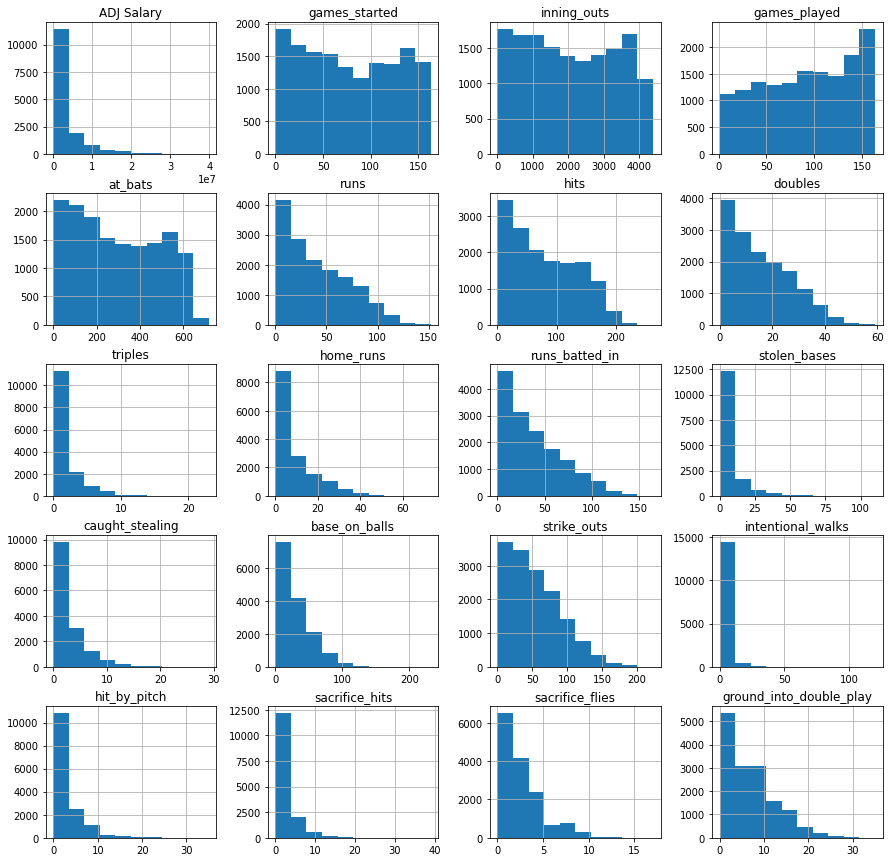

In [ ]:
examine_dataset(clean_df)

In [24]:
clean_df["ADJ Salary"] = clean_df["ADJ Salary"].astype("int").round()

In [25]:
clean_df["ADJ Salary"]

0         1310892
1         1503316
2         1924245
3          601326
4         3607960
           ...   
15018     6739673
15019      576808
15020      565054
15021    23436394
15022    15096868
Name: ADJ Salary, Length: 15023, dtype: int64

In [26]:
# Assign X and y

X = clean_df.drop(["ADJ Salary"], axis=1)
y = clean_df["ADJ Salary"]

In [27]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

StandardScaler()

In [29]:
# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = LinearRegression().fit(X_train_scaled, y_train)

In [31]:
# Score the model

print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")

Linear Regression Training Data Score: 0.2769956425847886
Linear Regression Testing Data Score: 0.28064339079672496


# **LINEAR REGRESSION BLOCK END**

# **PCA START BLOCK**

In [21]:
clean_df.head(10)

,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,1.310892e+06,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1.503317e+06,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1.924245e+06,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,6.013267e+05,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,3.607960e+06,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
5,1.094415e+06,130.0,3425.0,142,439,51,102,21,0,5,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
6,1.864113e+06,113.0,3009.0,130,444,52,123,25,2,8,61.0,6.0,7.0,37,57.0,8.0,0.0,1.0,6.0,9.0
7,3.908623e+06,161.0,4264.0,162,616,118,185,32,2,37,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0
8,1.483273e+06,113.0,3041.0,134,412,30,112,19,4,3,35.0,1.0,2.0,51,38.0,6.0,6.0,1.0,2.0,10.0
9,2.886368e+05,50.0,1325.0,110,238,22,51,5,0,3,13.0,9.0,5.0,23,28.0,1.0,0.0,0.0,1.0,7.0


In [22]:
clean_df.columns

Index(['ADJ Salary', 'games_started', 'inning_outs', 'games_played', 'at_bats', 'runs', 'hits', 'doubles', 'triples', 'home_runs', 'runs_batted_in', 'stolen_bases', 'caught_stealing', 'base_on_balls', 'strike_outs', 'intentional_walks', 'hit_by_pitch', 'sacrifice_hits', 'sacrifice_flies', 'ground_into_double_play'], dtype='object')

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [32]:
# Drop ADJ Salary column
clean_df2= clean_df.drop(["ADJ Salary"], axis=1)
clean_df2.head()

,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0


In [48]:
clean_df2.shape

(15023, 21)

In [33]:
# Standardize the dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
clean_scaled = StandardScaler().fit_transform(clean_df2)
print(clean_scaled)

[[-0.21948384 -0.29710163 -0.44995249 ...  0.76262976 -0.21357711
   0.22778954]
 [-0.03462159  0.017153    0.10045477 ... -0.65386786  0.59128151
   1.48696616]
 [-1.04109384 -0.99334497  0.20630232 ... -0.65386786 -0.61600641
  -0.31185758]
 ...
 [-0.60974859 -0.55071063 -0.32293543 ... -0.65386786 -0.61600641
  -0.8515047 ]
 [ 1.13617265  1.10168591  1.09542174 ... -0.65386786  1.39614012
   1.84673091]
 [ 0.6226664   0.65511354  0.50267546 ... -0.65386786  1.39614012
   0.94731904]]


In [34]:
# Perform dimensionality reduction with PCA preserving 90% of the explained variance ( n_components=0.90)
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
clean_pca = pca.fit_transform(clean_scaled)

In [35]:
clean_pca.shape

(15023, 8)

In [58]:
clean_df_pca = pd.DataFrame(data=clean_pca)
clean_df_pca

,0,1,2,3,4,5,6,7
0,-2.129142,0.161946,-1.100481,0.750238,0.413990,0.230941,-0.289555,0.313748
1,-0.812285,-0.605887,-0.725042,0.803254,-0.756079,0.774803,-0.784933,0.858033
2,-2.517912,-0.858035,0.346362,0.621727,0.270552,0.078622,-0.000299,0.034361
3,2.921484,0.374660,0.490985,0.075945,-0.319433,-0.517688,-1.120689,0.446311
4,3.381124,-1.862350,-0.364855,1.154485,-1.232100,0.176095,0.344205,0.118125
...,...,...,...,...,...,...,...,...
15018,0.258709,2.101229,0.223872,-0.084460,-1.052517,0.191629,1.262586,0.859395
15019,-1.911555,-0.738348,-0.477087,0.077868,-0.260636,1.062002,0.050988,-0.694397
15020,-1.601219,0.383370,0.839725,-0.577377,-0.489414,-0.320864,-0.964287,-0.577149
15021,4.103488,-1.846485,-0.981895,-0.328564,-1.195823,-0.348865,-1.068220,-0.783920


In [59]:
# Transform PCA data to a DataFrame
clean_df_pca = pd.DataFrame(data=clean_pca, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7","principal component 8"])
clean_df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-2.129142,0.161946,-1.100481,0.750238,0.413990,0.230941,-0.289555,0.313748
1,-0.812285,-0.605887,-0.725042,0.803254,-0.756079,0.774803,-0.784933,0.858033
2,-2.517912,-0.858035,0.346362,0.621727,0.270552,0.078622,-0.000299,0.034361
3,2.921484,0.374660,0.490985,0.075945,-0.319433,-0.517688,-1.120689,0.446311
4,3.381124,-1.862350,-0.364855,1.154485,-1.232100,0.176095,0.344205,0.118125


In [38]:
clean_df_pca.columns

Index(['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'], dtype='object')

In [39]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.61737547, 0.1102817 , 0.04828491, 0.03961469, 0.03271577,
       0.02543432, 0.02532238, 0.02367967])

In [41]:
# Further reduce the dataset dimensions with t-SNE

# Initialize t-SNE model
tsne = TSNE(learning_rate = 50)

# Reduce dimensions
tsne_features = tsne.fit_transform(clean_pca)

# The dataset has 2 columns
tsne_features.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(15023, 2)

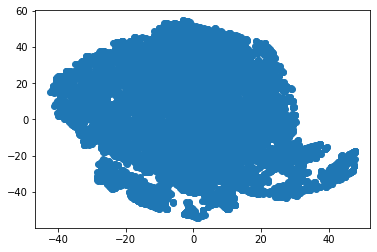

In [42]:
# Prepare to plot the dataset

# The first column of transformed features
clean_df2["x"] = tsne_features[:,0]

# The second column of transformed features
clean_df2["y"] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(clean_df2["x"],clean_df2["y"])
plt.show()

In [43]:
labels = clean_df["ADJ Salary"]
labels.value_counts()

185107      93
198019      92
310697      86
269925      76
195227      75
            ..
10161904     1
10345815     1
5716071      1
5689607      1
23436394     1
Name: ADJ Salary, Length: 6766, dtype: int64

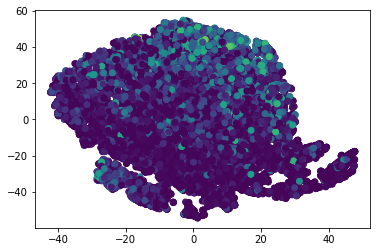

In [44]:
# Visualize the clusters with color
plt.scatter(clean_df2["x"],clean_df2["y"], c=labels)
plt.show()

# Perform a Cluster Analysis with K-means

In [46]:
# Finding the best value for k using the Elbow Curve
inertia = []
k = list(range(1, 9))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(clean_df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,263375.262557
1,2,130530.110894
2,3,106718.580155
3,4,90657.834535
4,5,82337.206850
5,6,77582.075440
6,7,73011.582001
7,8,69981.061840


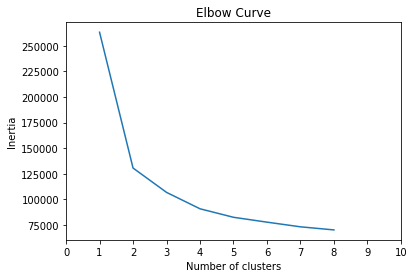

In [47]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [50]:
 # If possible, determine where the elbow of the plot is, and at which value of k it appears.
# Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [51]:
clusters = get_clusters(2, clean_df_pca)
clusters




,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,class
0,-2.129142,0.161946,-1.100481,0.750238,0.413990,0.230941,-0.289555,0.313748,1
1,-0.812285,-0.605887,-0.725042,0.803254,-0.756079,0.774803,-0.784933,0.858033,1
2,-2.517912,-0.858035,0.346362,0.621727,0.270552,0.078622,-0.000299,0.034361,1
3,2.921484,0.374660,0.490985,0.075945,-0.319433,-0.517688,-1.120689,0.446311,0
4,3.381124,-1.862350,-0.364855,1.154485,-1.232100,0.176095,0.344205,0.118125,0
...,...,...,...,...,...,...,...,...,...
15018,0.258709,2.101229,0.223872,-0.084460,-1.052517,0.191629,1.262586,0.859395,1
15019,-1.911555,-0.738348,-0.477087,0.077868,-0.260636,1.062002,0.050988,-0.694397,1
15020,-1.601219,0.383370,0.839725,-0.577377,-0.489414,-0.320864,-0.964287,-0.577149,1
15021,4.103488,-1.846485,-0.981895,-0.328564,-1.195823,-0.348865,-1.068220,-0.783920,0


In [52]:
def show_clusters(df):
    plt.scatter(df['principal component 1'], df['principal component 2'], c=df['class'])
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.title("ADJ Salary clusters")
    plt.show()

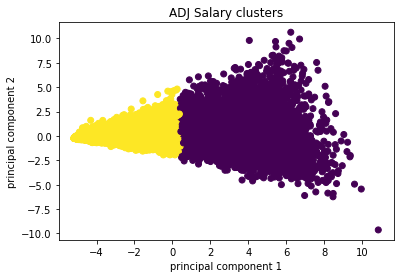

In [53]:
show_clusters(clusters)

In [37]:
# **PCA END BLOCK**

# **PCA END BLOCK**